In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Grab and process the raw data.
data_path = "NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013.csv"
#crime_data_original = pd.read_csv(data_path, delimiter= ',', converters={"Robbery":int, "Murder":int})

#crime_data_original = pd.read_csv(data_path, delimiter= ',')
#crime_data_original

crime_data_original = pd.read_csv(data_path, sep=',', thousands=',', engine='python')
#crime_data_original['Population'] = crime_data_original['Population'].astype('int')

In [60]:
crime_data_original = crime_data_original[['City','Population','Violent crime','Murder','Rape (legacy definition)2','Robbery','Aggravated assault','Property crime','Burglary','Larceny - theft','Motor vehicle theft']]


# crime_data_original.isnull().sum()

# crime_data_original.dropna(inplace=True)

# crime_data_original.isnull().sum()

In [61]:
crime_data_original.isnull().sum()

crime_data_original.dropna(inplace=True)

crime_data_original.isnull().sum()

City                         0
Population                   0
Violent crime                0
Murder                       0
Rape (legacy definition)2    0
Robbery                      0
Aggravated assault           0
Property crime               0
Burglary                     0
Larceny - theft              0
Motor vehicle theft          0
dtype: int64

In [64]:
# create categorical variables for Murder & Robbery
# values = 0 set to 0
# vlaues > 0 set to 1
#crime_data['Robbery'] = (crime_data_original['Robbery'] > 0)
crime_data_original
crime_data_original['Population'] = crime_data_original['Population'].astype('int')
crime_data_original['Murder'] = crime_data_original['Murder'].astype('int')
crime_data_original['Robbery'] = crime_data_original['Robbery'].astype('int')
crime_data_original

,City,Population,Violent crime,Murder,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny - theft,Motor vehicle theft
0,Adams Village,1861,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0
1,Addison Town and Village,2577,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0
2,Akron Village,2846,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0
3,Albany,97956,791.0,8,30.0,227,526.0,4090.0,705.0,3243.0,142.0
4,Albion Village,6388,23.0,0,3.0,4,16.0,223.0,53.0,165.0,5.0
5,Alfred Village,4089,5.0,0,0.0,3,2.0,46.0,10.0,36.0,0.0
6,Allegany Village,1781,3.0,0,0.0,0,3.0,10.0,0.0,10.0,0.0
7,Amherst Town,118296,107.0,1,7.0,31,68.0,2118.0,204.0,1882.0,32.0
8,Amityville Village,9519,9.0,0,2.0,4,3.0,210.0,16.0,188.0,6.0
9,Amsterdam,18182,30.0,0,0.0,12,18.0,405.0,99.0,291.0,15.0


(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.,  1917.,  3834.,  5751.,  7668.,  9585., 11502., 13419.,
        15336., 17253., 19170.]),
 <a list of 10 Patch objects>)

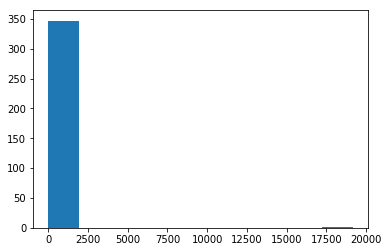

In [65]:
plt.hist(crime_data_original['Robbery'])

In [70]:
crime_data_original['Robbery_cat'] = [1 if np.float(i) > 0 else 0 for i in crime_data_original['Robbery']] 
crime_data_original['Murder_cat'] = [1 if np.float(i) > 0 else 0 for i in crime_data_original['Murder']] 
crime_data_original['Pop2'] = [i*i for i in crime_data_original['Population']] 

In [71]:
crime_data_original

,City,Population,Violent crime,Murder,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny - theft,Motor vehicle theft,Robbery_cat,Murder_cat,Pop2
0,Adams Village,1861,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0,0,0,3463321
1,Addison Town and Village,2577,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0,0,0,6640929
2,Akron Village,2846,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0,0,0,8099716
3,Albany,97956,791.0,8,30.0,227,526.0,4090.0,705.0,3243.0,142.0,1,1,9595377936
4,Albion Village,6388,23.0,0,3.0,4,16.0,223.0,53.0,165.0,5.0,1,0,40806544
5,Alfred Village,4089,5.0,0,0.0,3,2.0,46.0,10.0,36.0,0.0,1,0,16719921
6,Allegany Village,1781,3.0,0,0.0,0,3.0,10.0,0.0,10.0,0.0,0,0,3171961
7,Amherst Town,118296,107.0,1,7.0,31,68.0,2118.0,204.0,1882.0,32.0,1,1,13993943616
8,Amityville Village,9519,9.0,0,2.0,4,3.0,210.0,16.0,188.0,6.0,1,0,90611361
9,Amsterdam,18182,30.0,0,0.0,12,18.0,405.0,99.0,291.0,15.0,1,0,330585124
